In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
my_loss(gt_depth, pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.015625>

In [ ]:
t = None

In [87]:
for i in range(3):
    pred1 = tf.roll(pred, i, axis = -2)
    for j in range(3):
        pred2 = tf.roll(pred1, j, axis = -3)
        print(my_loss(gt_depth, pred2,1)+my_loss(gt_depth, pred2,0))
        if i == 0 and j ==1:
            t = pred2

tf.Tensor(0.15, shape=(), dtype=float32)
tf.Tensor(0.29375, shape=(), dtype=float32)
tf.Tensor(0.38125, shape=(), dtype=float32)
tf.Tensor(0.87812495, shape=(), dtype=float32)
tf.Tensor(0.8874999, shape=(), dtype=float32)
tf.Tensor(0.93125, shape=(), dtype=float32)
tf.Tensor(0.225, shape=(), dtype=float32)
tf.Tensor(0.371875, shape=(), dtype=float32)
tf.Tensor(0.4, shape=(), dtype=float32)


In [50]:
print(my_loss(gt_depth, t,1)+my_loss(gt_depth, t,0))

tf.Tensor(0.35, shape=(), dtype=float32)


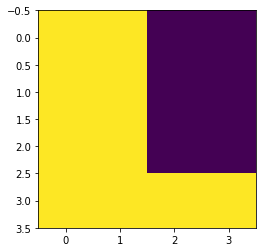

In [55]:
plt.imshow(tf.squeeze(t))

In [86]:
def my_loss(gt_depth, y_pred_semantic, class_number):
    phi =  tf.cast(tf.math.equal(y_pred_semantic, class_number), dtype = tf.float32)
    phi_x = tf.roll(phi, 1, axis = -3)
    phi_y = tf.roll(phi, 1, axis = -2)
    depth_x = tf.roll(gt_depth, 1, axis = -3)
    depth_y = tf.roll(gt_depth, 1, axis = -2)
    diffx = tf.multiply(tf.math.abs(gt_depth - depth_x),1- tf.math.abs((phi - phi_x)))
    diffx_no_nan = tf.where(tf.math.is_nan(diffx), tf.zeros_like(diffx), diffx)
    
    
    diffy = tf.multiply(tf.math.abs(gt_depth - depth_y),1- tf.math.abs((phi - phi_y)))
    diffy_no_nan = tf.where(tf.math.is_nan(diffy), tf.zeros_like(diffy), diffy)
    
    return tf.keras.backend.mean(diffx_no_nan + diffy_no_nan)

In [68]:
gt_depth = tf.constant([1, 1, 0, 0,   1, 1,0,0,  float('nan') ,1 ,0.25 ,0.5, 1 ,1, 0.1, 0.1], shape=(1,4,4,1))

In [69]:
gt_depth

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[1.  ],
         [1.  ],
         [0.  ],
         [0.  ]],

        [[1.  ],
         [1.  ],
         [0.  ],
         [0.  ]],

        [[ nan],
         [1.  ],
         [0.25],
         [0.5 ]],

        [[1.  ],
         [1.  ],
         [0.1 ],
         [0.1 ]]]], dtype=float32)>

In [72]:
pred = tf.constant([1, 1, 0, 0,   1, 1,0,0,  float('NaN') ,1 ,1 ,1, 1 ,1, 0, 0], shape=(1,4,4,1))

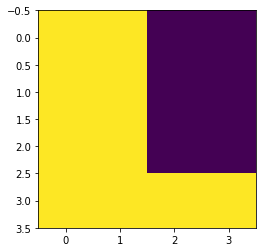

In [39]:
plt.imshow(tf.squeeze(tf.roll(pred, 1, axis = -3)))

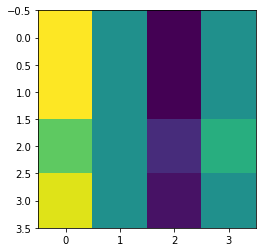

In [14]:
plt.imshow(gt_depth-depth_x)

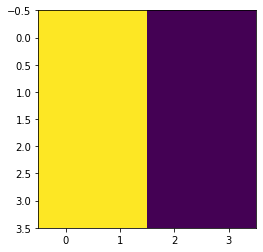

In [10]:
plt.imshow(pred)

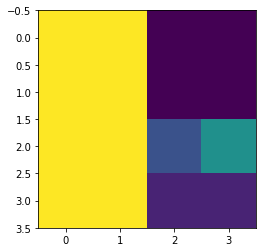

In [8]:
plt.imshow(gt_depth)

In [20]:
gt_exp = tf.expand_dims(tf.expand_dims(gt_depth,axis = 0),axis = -1)

In [22]:
dy_true, dx_true = tf.image.image_gradients(gt_exp)

In [6]:
class_1 = tf.cast(tf.math.equal(pred, 1), dtype = tf.float32)

In [7]:
phi = class_1
phi

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]], dtype=float32)>

In [12]:
phi_x = tf.roll(phi, 1, axis = 1)
phi_y = tf.roll(phi, 1, axis = 0)
depth_x = tf.roll(gt_depth, 1, axis = 1)
depth_y = tf.roll(gt_depth, 1, axis = 0)
    

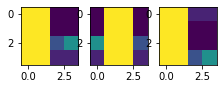

In [46]:
plt.subplot(1,5,1)
plt.imshow(gt_depth)
plt.subplot(1,5,2)
plt.imshow(depth_x)
plt.subplot(1,5,3)
plt.imshow(depth_y)

In [47]:
loss_x = tf.multiply((gt_depth - depth_x), 1 - (phi - phi_x))

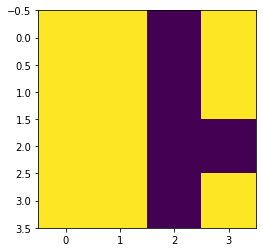

In [54]:
plt.imshow(loss_x == 0)

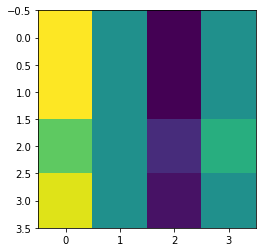

In [50]:
plt.imshow(gt_depth - depth_x)

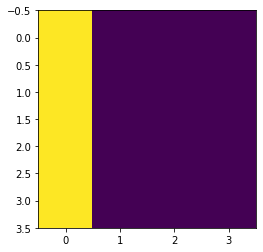

In [53]:
plt.imshow( (1 - (phi - phi_x)) == 0)

In [14]:
class_1 = tf.math.equal(pred, 1)
class_1

<tf.Tensor: shape=(4, 4), dtype=bool, numpy=
array([[ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False]])>

In [16]:
tf.boolean_mask(gt_depth, class_1)

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [17]:
tf.boolean_mask(gt_depth, class_2)

NameError: name 'class_2' is not defined